# 8. ADVANCED SQL

# 8.4. WRITING EFFICIENT QUERIES

# 8.4.1. COURS

## 8.4.1.1. STRATEGIES

## 8.4.1.1.1. Only select the columns you want.

In [ ]:
star_query = "SELECT * FROM `bigquery-public-data.github_repos.contents`"
show_amount_of_data_scanned(star_query)

basic_query = "SELECT size, binary FROM `bigquery-public-data.github_repos.contents`"
show_amount_of_data_scanned(basic_query)

# Data processed: 2523.552 GB
# Data processed: 2.412 GB

## 8.4.1.1.2. Read less data

In [ ]:
more_data_query = """
                  SELECT MIN(start_station_name) AS start_station_name,
                      MIN(end_station_name) AS end_station_name,
                      AVG(duration_sec) AS avg_duration_sec
                  FROM `bigquery-public-data.san_francisco.bikeshare_trips`
                  WHERE start_station_id != end_station_id 
                  GROUP BY start_station_id, end_station_id
                  LIMIT 10
                  """
show_amount_of_data_scanned(more_data_query)

less_data_query = """
                  SELECT start_station_name,
                      end_station_name,
                      AVG(duration_sec) AS avg_duration_sec                  
                  FROM `bigquery-public-data.san_francisco.bikeshare_trips`
                  WHERE start_station_name != end_station_name
                  GROUP BY start_station_name, end_station_name
                  LIMIT 10
                  """
show_amount_of_data_scanned(less_data_query)

# Data processed: 0.076 GB
# Data processed: 0.06 GB

## 8.4.1.1.3. Avoid N:N JOINs.

## 1:1 JOINs

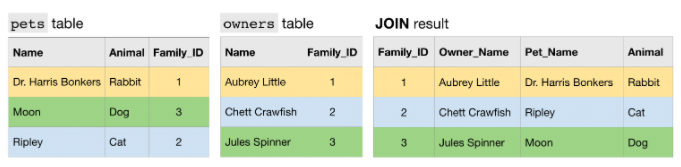

## N:1 JOIN

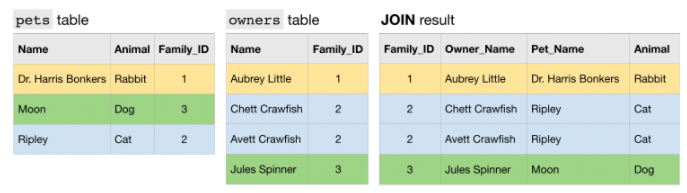

## N:N JOIN

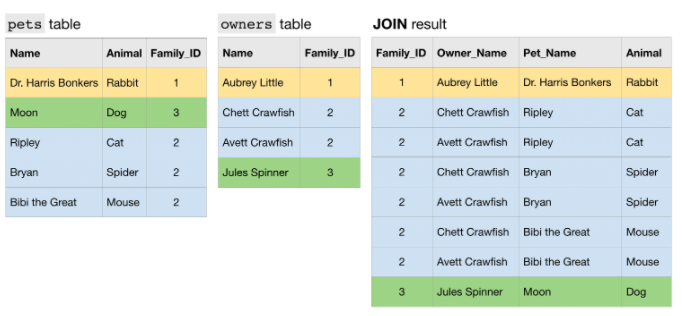

In [ ]:
big_join_query = """
                 SELECT repo,
                     COUNT(DISTINCT c.committer.name) as num_committers,
                     COUNT(DISTINCT f.id) AS num_files
                 FROM `bigquery-public-data.github_repos.commits` AS c,
                     UNNEST(c.repo_name) AS repo
                 INNER JOIN `bigquery-public-data.github_repos.files` AS f
                     ON f.repo_name = repo
                 WHERE f.repo_name IN ( 'tensorflow/tensorflow', 'facebook/react', 'twbs/bootstrap', 'apple/swift', 'Microsoft/vscode', 'torvalds/linux')
                 GROUP BY repo
                 ORDER BY repo
                 """
show_time_to_run(big_join_query)

small_join_query = """
                   WITH commits AS
                   (
                   SELECT COUNT(DISTINCT committer.name) AS num_committers, repo
                   FROM `bigquery-public-data.github_repos.commits`,
                       UNNEST(repo_name) as repo
                   WHERE repo IN ( 'tensorflow/tensorflow', 'facebook/react', 'twbs/bootstrap', 'apple/swift', 'Microsoft/vscode', 'torvalds/linux')
                   GROUP BY repo
                   ),
                   files AS 
                   (
                   SELECT COUNT(DISTINCT id) AS num_files, repo_name as repo
                   FROM `bigquery-public-data.github_repos.files`
                   WHERE repo_name IN ( 'tensorflow/tensorflow', 'facebook/react', 'twbs/bootstrap', 'apple/swift', 'Microsoft/vscode', 'torvalds/linux')
                   GROUP BY repo
                   )
                   SELECT commits.repo, commits.num_committers, files.num_files
                   FROM commits 
                   INNER JOIN files
                       ON commits.repo = files.repo
                   ORDER BY repo
                   """

show_time_to_run(small_join_query)

# Time to run: 1272.855 seconds
# Time to run: 4.494 seconds

# 8.4.2. EXERCICES

In [ ]:
# LENT

WITH LocationsAndOwners AS 
(
SELECT * 
FROM CostumeOwners co INNER JOIN CostumeLocations cl
   ON co.CostumeID = cl.CostumeID
),
LastSeen AS
(
SELECT CostumeID, MAX(Timestamp)
FROM LocationsAndOwners
GROUP BY CostumeID
)
SELECT lo.CostumeID, Location 
FROM LocationsAndOwners lo INNER JOIN LastSeen ls 
    ON lo.Timestamp = ls.Timestamp AND lo.CostumeID = ls.CostumeID
WHERE OwnerID = MitzieOwnerID

In [ ]:
#  PLUS RAPIDE

WITH CurrentOwnersCostumes AS
(
SELECT CostumeID 
FROM CostumeOwners 
WHERE OwnerID = MitzieOwnerID
),
OwnersCostumesLocations AS
(
SELECT cc.CostumeID, Timestamp, Location 
FROM CurrentOwnersCostumes cc INNER JOIN CostumeLocations cl
    ON cc.CostumeID = cl.CostumeID
),
LastSeen AS
(
SELECT CostumeID, MAX(Timestamp)
FROM OwnersCostumesLocations
GROUP BY CostumeID
)
SELECT ocl.CostumeID, Location 
FROM OwnersCostumesLocations ocl INNER JOIN LastSeen ls 
    ON ocl.timestamp = ls.timestamp AND ocl.CostumeID = ls.costumeID
Why is this better?